# Individual Data Analysis

# Accounts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
accounts = pd.read_csv('accounts.csv')

In [3]:
accounts.head(10)

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID
0,0,C_0,184.44,US,I,False,1
1,1,C_1,175.80,US,I,False,1
2,2,C_2,142.06,US,I,False,1
3,3,C_3,125.89,US,I,False,1
4,4,C_4,151.13,US,I,False,1
5,5,C_5,140.49,US,I,False,1
6,6,C_6,178.38,US,I,False,1
7,7,C_7,130.33,US,I,False,1
8,8,C_8,147.66,US,I,False,1
9,9,C_9,158.34,US,I,False,1


In [4]:
accounts.shape

(100000, 7)

In [5]:
accounts.columns

Index(['ACCOUNT_ID', 'CUSTOMER_ID', 'INIT_BALANCE', 'COUNTRY', 'ACCOUNT_TYPE',
       'IS_FRAUD', 'TX_BEHAVIOR_ID'],
      dtype='object')

In [6]:
accounts.dtypes

ACCOUNT_ID          int64
CUSTOMER_ID        object
INIT_BALANCE      float64
COUNTRY            object
ACCOUNT_TYPE       object
IS_FRAUD             bool
TX_BEHAVIOR_ID      int64
dtype: object

In [7]:
#making sure that there are no repeated account IDs
accounts.ACCOUNT_ID.nunique()

100000

In [8]:
#making sure that there are no repeated customer IDs
accounts.CUSTOMER_ID.nunique()

100000

In [9]:
accounts.TX_BEHAVIOR_ID.value_counts()

1    20000
2    20000
3    20000
4    20000
5    20000
Name: TX_BEHAVIOR_ID, dtype: int64

While marked as integer, the contents of Behavior ID seem to be categorical, for which they will be transformed to obect.

In [10]:
accounts['TX_BEHAVIOR_ID'] = accounts['TX_BEHAVIOR_ID'].astype(str)

In [11]:
print(accounts.dtypes)

ACCOUNT_ID          int64
CUSTOMER_ID        object
INIT_BALANCE      float64
COUNTRY            object
ACCOUNT_TYPE       object
IS_FRAUD             bool
TX_BEHAVIOR_ID     object
dtype: object


In [12]:
for col in ['COUNTRY', 'ACCOUNT_TYPE', 'IS_FRAUD', 'TX_BEHAVIOR_ID']:
    print(f'\nFrequency count for {col}:')
    print(accounts[col].value_counts())


Frequency count for COUNTRY:
US    100000
Name: COUNTRY, dtype: int64

Frequency count for ACCOUNT_TYPE:
I    100000
Name: ACCOUNT_TYPE, dtype: int64

Frequency count for IS_FRAUD:
False    82909
True     17091
Name: IS_FRAUD, dtype: int64

Frequency count for TX_BEHAVIOR_ID:
1    20000
2    20000
3    20000
4    20000
5    20000
Name: TX_BEHAVIOR_ID, dtype: int64


Country and Account Type Columns are irrelevant, as they contain one unique value each

In [13]:
accounts.drop(['COUNTRY', 'ACCOUNT_TYPE'], axis=1, inplace=True)

In [14]:
accounts

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,IS_FRAUD,TX_BEHAVIOR_ID
0,0,C_0,184.44,False,1
1,1,C_1,175.80,False,1
2,2,C_2,142.06,False,1
3,3,C_3,125.89,False,1
4,4,C_4,151.13,False,1
...,...,...,...,...,...
99995,99995,C_99995,327.16,True,5
99996,99996,C_99996,273.99,False,5
99997,99997,C_99997,289.10,True,5
99998,99998,C_99998,223.91,True,5


In [15]:
accounts.describe()

,ACCOUNT_ID,INIT_BALANCE
count,100000.000000,100000.000000
mean,49999.500000,279.888703
std,28867.657797,137.568366
min,0.000000,100.000000
25%,24999.750000,162.465000
50%,49999.500000,249.190000
75%,74999.250000,374.672500
max,99999.000000,599.990000


The mean in ACCOUNT_ID indicates a uniform distribution of IDs from 0 to 99,999. This is further confirmed by the standard deviation, showing a typical broad spectrum of account IDs over the range.

In terms of INIT_BALANCE, the mean shows that the average initial balance is approx. $279. The standaed deviation indicates variability in the initial balances amongst the accounts. 

In [16]:
sns.set(style='whitegrid')

In [17]:
# Calculate value counts
fraud_counts = accounts['IS_FRAUD'].value_counts()

# Calculate percentages
fraud_percentages = accounts['IS_FRAUD'].value_counts(normalize=True) * 100

# Display counts and percentages
print("Counts:")
print(fraud_counts)
print("\nPercentages:")
print(fraud_percentages)

Counts:
False    82909
True     17091
Name: IS_FRAUD, dtype: int64

Percentages:
False    82.909
True     17.091
Name: IS_FRAUD, dtype: float64


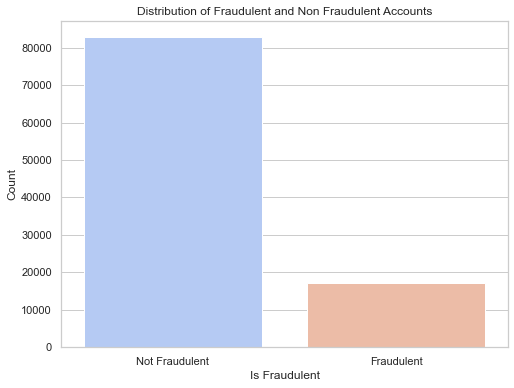

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='IS_FRAUD', data=accounts, palette='coolwarm')
plt.title('Distribution of Fraudulent and Non Fraudulent Accounts')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraudulent', 'Fraudulent'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

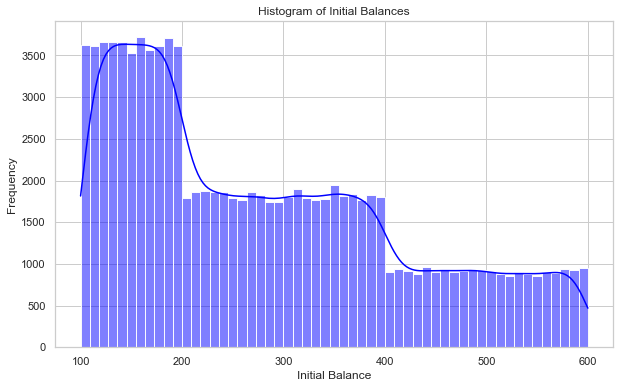

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(accounts['INIT_BALANCE'], kde=True, color='blue')
plt.title('Histogram of Initial Balances')
plt.xlabel('Initial Balance')
plt.ylabel('Frequency')
plt.show

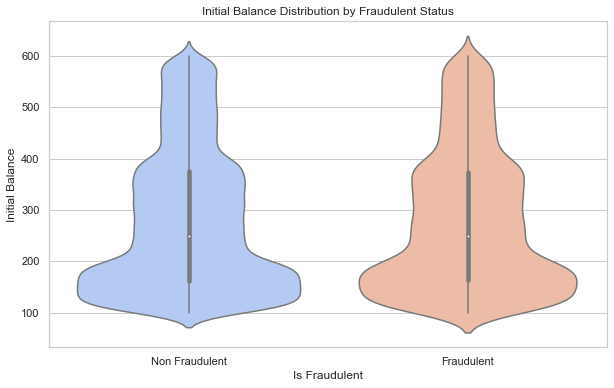

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='IS_FRAUD', y='INIT_BALANCE', data=accounts, palette='coolwarm')
plt.title('Initial Balance Distribution by Fraudulent Status')
plt.xlabel('Is Fraudulent')
plt.ylabel('Initial Balance')
plt.xticks([0,1], ['Non Fraudulent', 'Fraudulent'])
plt.show()

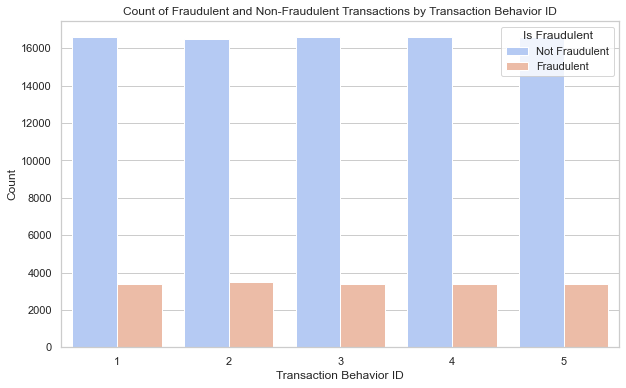

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TX_BEHAVIOR_ID', hue='IS_FRAUD', data=accounts, palette='coolwarm')
plt.title('Count of Fraudulent and Non-Fraudulent Transactions by Transaction Behavior ID')
plt.xlabel('Transaction Behavior ID')
plt.ylabel('Count')
plt.legend(title='Is Fraudulent', labels=['Not Fraudulent', 'Fraudulent'])
plt.show()

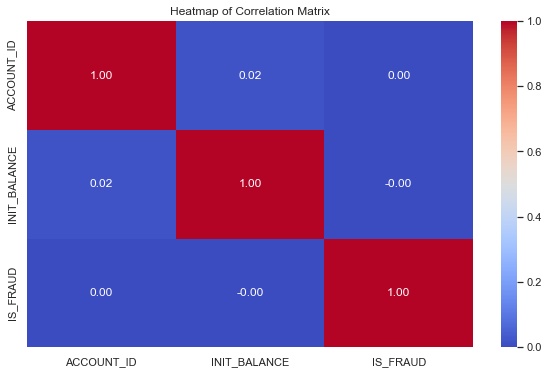

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(accounts.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Transactions

In [23]:
transactions = pd.read_csv('transactions.csv')

In [24]:
transactions.head(10)

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,5942,92982,TRANSFER,516.95,0,False,-1
1,2,86700,43995,TRANSFER,197.88,0,False,-1
2,3,86700,95516,TRANSFER,197.88,0,False,-1
3,4,86700,83911,TRANSFER,197.88,0,False,-1
4,5,86700,82801,TRANSFER,197.88,0,False,-1
5,6,86700,10605,TRANSFER,197.88,0,False,-1
6,7,86700,88864,TRANSFER,197.88,0,False,-1
7,8,86700,25971,TRANSFER,197.88,0,False,-1
8,9,86700,74981,TRANSFER,197.88,0,False,-1
9,10,86700,42920,TRANSFER,197.88,0,False,-1


In [25]:
transactions.shape

(12476012, 8)

In [26]:
transactions.columns

Index(['TX_ID', 'SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 'TX_TYPE',
       'TX_AMOUNT', 'TIMESTAMP', 'IS_FRAUD', 'ALERT_ID'],
      dtype='object')

In [27]:
transactions.dtypes

TX_ID                    int64
SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
TX_TYPE                 object
TX_AMOUNT              float64
TIMESTAMP                int64
IS_FRAUD                  bool
ALERT_ID                 int64
dtype: object

In [28]:
transactions['ALERT_ID'] = transactions['ALERT_ID'].astype(str)
print(transactions.dtypes)

TX_ID                    int64
SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
TX_TYPE                 object
TX_AMOUNT              float64
TIMESTAMP                int64
IS_FRAUD                  bool
ALERT_ID                object
dtype: object


In [29]:
transactions.describe()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP
count,1.247601e+07,1.247601e+07,1.247601e+07,1.247601e+07,1.247601e+07
mean,6.238006e+06,4.954179e+04,4.953202e+04,2.264288e+04,9.945583e+01
std,3.601515e+06,2.884096e+04,2.881305e+04,3.428947e+05,5.771132e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.119004e+06,2.500700e+04,2.398900e+04,2.129000e+01,4.900000e+01
50%,6.238006e+06,4.993600e+04,4.882500e+04,1.547100e+02,9.900000e+01
75%,9.357009e+06,7.500600e+04,7.395500e+04,4.477900e+02,1.490000e+02
max,1.247601e+07,9.999900e+04,9.999900e+04,2.147484e+07,1.990000e+02


The mean and median SENDER_ACCOUNT_ID and RECEIVER_ACCOUNT_ID are close, indicating a relatively uniform distribution of IDs.
TX_AMOUNT has a large standard deviation of compared to its mean, indicating a wide range of transaction amounts, some possibly being much larger than the mean.
The difference between the std and mean in TIMESTAMP idnciates variability in the timing of transactions.

In [30]:
# Calculate value counts
fraud_counts = transactions['IS_FRAUD'].value_counts()

# Calculate percentages
fraud_percentages = transactions['IS_FRAUD'].value_counts(normalize=True) * 100

# Display counts and percentages
print("Counts:")
print(fraud_counts)
print("\nPercentages:")
print(fraud_percentages)

Counts:
False    12458960
True        17052
Name: IS_FRAUD, dtype: int64

Percentages:
False    99.863322
True      0.136678
Name: IS_FRAUD, dtype: float64


<AxesSubplot:>

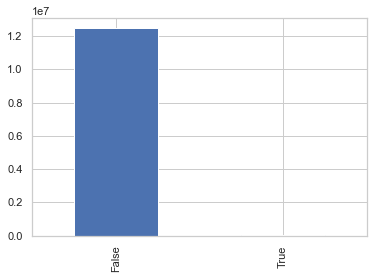

In [31]:
transactions.IS_FRAUD.value_counts().plot(kind='bar')
#confirming class imbalance

In [32]:
transactions.TX_TYPE.value_counts()

TRANSFER    12476012
Name: TX_TYPE, dtype: int64

TX_TYPE is irrelevant, as it contains one unique value

In [33]:
transactions.drop(['TX_TYPE'], axis=1, inplace=True)

In [34]:
transactions.ALERT_ID.value_counts()

-1      12458960
3116           5
2827           5
2442           5
2435           5
          ...   
3956           1
2613           1
1039           1
909            1
265            1
Name: ALERT_ID, Length: 3911, dtype: int64

## Correlations

### Sender ID

In [35]:
fraud_by_sender = pd.crosstab(transactions['SENDER_ACCOUNT_ID'], transactions['IS_FRAUD'])

print('Contingency Table for SENDER_ACCOUNT_IS vs. IS_FRAUD:')
print(fraud_by_sender)

Contingency Table for SENDER_ACCOUNT_IS vs. IS_FRAUD:
IS_FRAUD           False  True
SENDER_ACCOUNT_ID             
0                     20     0
1                     23     0
2                     21     0
3                     16     0
4                     44     0
...                  ...   ...
99995                 57     2
99996                 63     0
99997                 92     1
99998                 80     1
99999                 85     0

[100000 rows x 2 columns]


The **Pearson correlation coefficient** measures the linear relationship between two continuous variables. It ranges from -1 to 1, where:

* 1 indicates a perfect positive linear relationship,
* -1 indicates a perfect negative linear relationship, and
* 0 indicates no linear relationship.

In [36]:
import scipy.stats

sender_account_id = transactions['SENDER_ACCOUNT_ID']
is_fraud = transactions['IS_FRAUD']

correlation_coef, p_value = scipy.stats.pearsonr(sender_account_id, is_fraud)

print('Pearson correlation coefficient:', correlation_coef)

Pearson correlation coefficient: 0.0007323989044449373


### Receiver ID

In [37]:
fraud_by_receiver = pd.crosstab(transactions['RECEIVER_ACCOUNT_ID'], transactions['IS_FRAUD'])

print('\nContingency Table for RECEIVER_ACCOUNT_ID vs. IS_FRAUD:')
print(fraud_by_receiver)


Contingency Table for RECEIVER_ACCOUNT_ID vs. IS_FRAUD:
IS_FRAUD             False  True
RECEIVER_ACCOUNT_ID             
0                       22     0
1                        3     0
2                       20     0
3                       20     0
4                       20     0
...                    ...   ...
99995                  573     1
99996                  503     0
99997                  744     1
99998                 1002     0
99999                 1237     0

[99069 rows x 2 columns]


In [38]:
receiver_account_id = transactions['RECEIVER_ACCOUNT_ID']
is_fraud = transactions['IS_FRAUD']

correlation_coef, p_value = scipy.stats.pearsonr(receiver_account_id, is_fraud)

print('Pearson correlation coefficient:', correlation_coef)

Pearson correlation coefficient: 0.0002234311241454905


#analyzing network relations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

sender = transactions['SENDER_ACCOUNT_ID']
receiver = transactions['RECEIVER_ACCOUNT_ID']
tx_amounts = transactions['TX_AMOUNT']

# Apply polynomial regression to sender account data
degree = 2 
poly_features = PolynomialFeatures(degree=degree)
X_sender = poly_features.fit_transform(sender.values.reshape(-1, 1))
y_sender = tx_amounts.values
model_sender = LinearRegression().fit(X_sender, y_sender)

# Apply polynomial regression to receiver account data
X_receiver = poly_features.fit_transform(receiver.values.reshape(-1, 1))
y_receiver = tx_amounts.values
model_receiver = LinearRegression().fit(X_receiver, y_receiver)

# Plot sender account data and polynomial curve
plt.scatter(sender, tx_amounts, label='Sender Account Data')
plt.plot(sender, model_sender.predict(X_sender), color='red', label='Sender Polynomial Fit')

# Plot receiver account data and polynomial curve
plt.scatter(receiver, tx_amounts, label='Receiver Account Data')
plt.plot(receiver, model_receiver.predict(X_receiver), color='blue', label='Receiver Polynomial Fit')

plt.xlabel('Account ID')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot with Polynomial Regression for Sender and Receiver Accounts')
plt.legend()
plt.grid(True)
plt.show()

### Timestamp

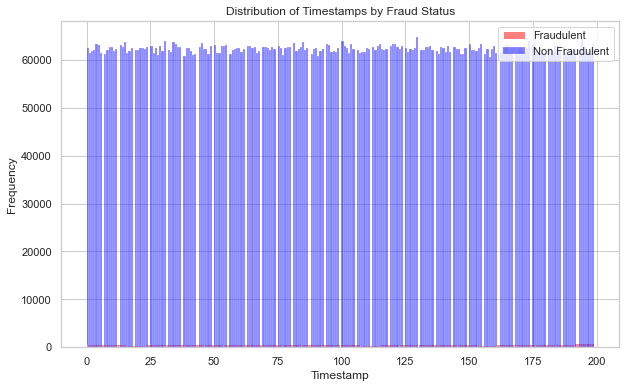

In [39]:
fraudulent_transactions = transactions[transactions['IS_FRAUD'] == True]
non_fraudulent_transactions = transactions[transactions['IS_FRAUD'] == False]

plt.figure(figsize=(10,6))
sns.histplot(fraudulent_transactions['TIMESTAMP'], color='red', alpha=0.5, label='Fraudulent')
sns.histplot(non_fraudulent_transactions['TIMESTAMP'], color='blue', alpha=0.5, label='Non Fraudulent')
plt.title('Distribution of Timestamps by Fraud Status')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Transaction Amount

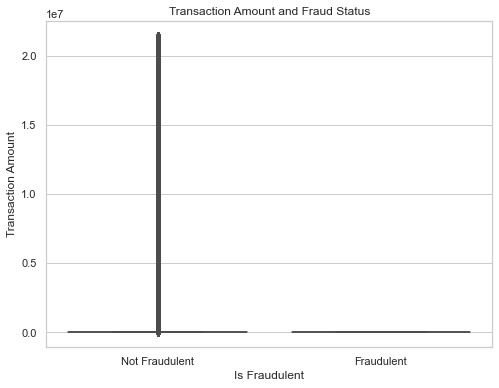

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='IS_FRAUD', y='TX_AMOUNT', data=transactions)
plt.title('Transaction Amount and Fraud Status')
plt.xlabel('Is Fraudulent')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Not Fraudulent', 'Fraudulent'])
plt.show()

### Numerical Features

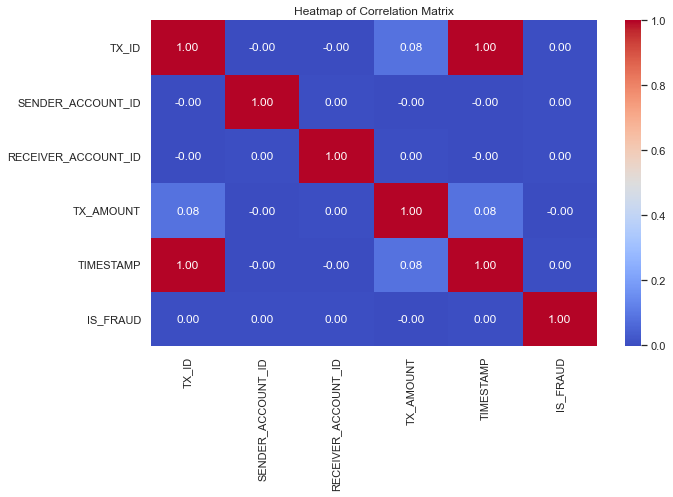

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(transactions.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [42]:
timestamp = transactions['TIMESTAMP']
tx_amount = transactions['TX_AMOUNT']

correlation_coef, p_value = scipy.stats.pearsonr(timestamp, tx_amount)

print('Pearson correlation coefficient:', correlation_coef)

Pearson correlation coefficient: 0.08380822558316398


# Alerts

In [43]:
alerts = pd.read_csv('alerts.csv')

In [44]:
alerts.head(10)

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
0,2036,cycle,True,188,24830,33880,TRANSFER,12.40,0
1,842,fan_in,True,556,45959,91430,TRANSFER,3.07,0
2,3000,cycle,True,1038,25885,22925,TRANSFER,13.06,0
3,280,fan_in,True,1051,80408,27980,TRANSFER,2.79,0
4,2861,cycle,True,2415,96988,91037,TRANSFER,12.84,0
5,1252,fan_in,True,2737,41576,94117,TRANSFER,4.48,0
6,1147,fan_in,True,2950,21605,33312,TRANSFER,4.19,0
7,802,fan_in,True,3011,4475,65944,TRANSFER,4.02,0
8,2600,cycle,True,3251,37435,52470,TRANSFER,18.22,0
9,1106,fan_in,True,3719,8896,78512,TRANSFER,4.16,0


In [45]:
alerts.shape

(17052, 9)

In [46]:
alerts.columns

Index(['ALERT_ID', 'ALERT_TYPE', 'IS_FRAUD', 'TX_ID', 'SENDER_ACCOUNT_ID',
       'RECEIVER_ACCOUNT_ID', 'TX_TYPE', 'TX_AMOUNT', 'TIMESTAMP'],
      dtype='object')

In [47]:
alerts.dtypes

ALERT_ID                 int64
ALERT_TYPE              object
IS_FRAUD                  bool
TX_ID                    int64
SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
TX_TYPE                 object
TX_AMOUNT              float64
TIMESTAMP                int64
dtype: object

In [48]:
# ALERT_ID is categorical rather than numerical

alerts['ALERT_ID'] = alerts['ALERT_ID'].astype(str)
print(alerts.dtypes)

ALERT_ID                object
ALERT_TYPE              object
IS_FRAUD                  bool
TX_ID                    int64
SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
TX_TYPE                 object
TX_AMOUNT              float64
TIMESTAMP                int64
dtype: object


In [49]:
alerts.describe()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP
count,1.705200e+04,17052.000000,17052.000000,17052.000000,17052.000000
mean,6.276044e+06,50112.756216,49706.032372,10.052406,100.066502
std,3.658158e+06,28713.546884,28786.808741,6.013111,58.620294
min,1.880000e+02,13.000000,13.000000,2.500000,0.000000
25%,3.068494e+06,25775.250000,24830.750000,3.870000,49.000000
50%,6.246108e+06,50132.500000,49057.500000,11.100000,100.000000
75%,9.461026e+06,74634.250000,74215.500000,15.600000,151.000000
max,1.247585e+07,99998.000000,99997.000000,20.000000,199.000000


The std of TX_AMOUNT is relatively large compared to the mean, indicating a wide range of transaction amounts, contributing to high variability in the data. Similarly, the difference between mean and std in TIMESTAMP indicates variability in the timing of transactions. 

In [50]:
alerts.IS_FRAUD.value_counts()

True    17052
Name: IS_FRAUD, dtype: int64

Alerts are only initiated in cases of fraudulent transactions.

In [51]:
alerts.ALERT_TYPE.value_counts()

cycle     9513
fan_in    7539
Name: ALERT_TYPE, dtype: int64

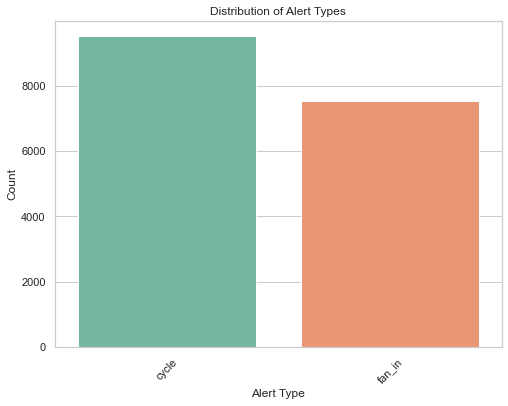

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ALERT_TYPE', data=alerts, palette='Set2')
plt.title('Distribution of Alert Types')
plt.xlabel('Alert Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [53]:
alerts.TX_TYPE.value_counts() 

TRANSFER    17052
Name: TX_TYPE, dtype: int64

In [54]:
#elminiate as it only contains one unique value
alerts.drop(['TX_TYPE'], axis=1, inplace=True)

In [55]:
#are some alerts raised by the same sender?
alerts.SENDER_ACCOUNT_ID.value_counts()

79999    6
61999    6
27999    6
26999    5
30999    5
        ..
75952    1
78247    1
90883    1
30911    1
58261    1
Name: SENDER_ACCOUNT_ID, Length: 14923, dtype: int64

In [56]:
#what about receivers?
alerts.RECEIVER_ACCOUNT_ID.value_counts()

61999    8
26999    7
90995    7
79999    7
46985    7
        ..
51927    1
19523    1
18483    1
92579    1
19829    1
Name: RECEIVER_ACCOUNT_ID, Length: 10391, dtype: int64

In [57]:
# Check for duplicates based on combination of sender ID and receiver ID
pairs = alerts.duplicated(subset=['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'], keep=False)
duplicate_pairs = alerts[pairs]
print(duplicate_pairs)

      ALERT_ID ALERT_TYPE  IS_FRAUD     TX_ID  SENDER_ACCOUNT_ID  \
11        2455      cycle      True      4004              16840   
175       2651      cycle      True    121485              41579   
390       2455      cycle      True    261597              17977   
395       2539      cycle      True    263742              14566   
672       2928      cycle      True    450137              16840   
...        ...        ...       ...       ...                ...   
14833     3843      cycle      True  11040888              26897   
15021     3221      cycle      True  11169612              62358   
15545     2504      cycle      True  11514165              38949   
16724     1682     fan_in      True  12267967              23646   
16869     3253      cycle      True  12350228              48938   

       RECEIVER_ACCOUNT_ID  TX_AMOUNT  TIMESTAMP  
11                   17977      11.38          0  
175                   1986      14.72          1  
390                  17690    

In [58]:
pair_counts = alerts.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID']).size()
duplicate_pairs = pair_counts[pair_counts > 1]

print(duplicate_pairs)

SENDER_ACCOUNT_ID  RECEIVER_ACCOUNT_ID
1988               56285                  2
2198               33482                  2
2240               14497                  2
3796               2765                   2
10145              3858                   2
14566              46464                  2
16840              17977                  2
17977              17690                  2
23646              66256                  2
26897              22434                  2
27280              3345                   2
30497              47921                  2
32719              70648                  2
33482              2198                   2
33927              9216                   2
33988              54884                  2
36245              4334                   2
38949              83761                  2
41153              80977                  2
41579              1986                   2
47935              6993                   2
48413              80982             

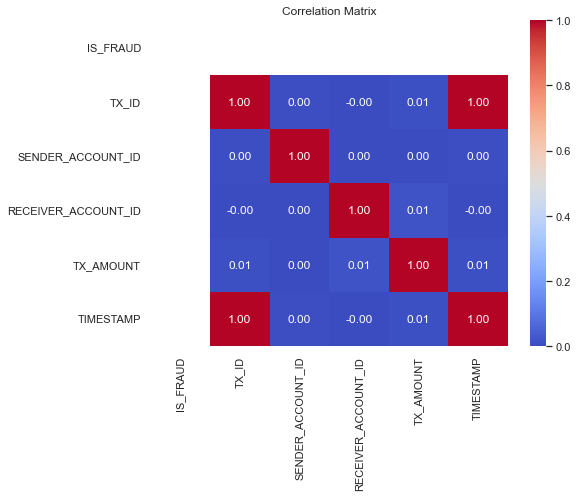

In [59]:
# Check correlation between numerical columns
correlation_matrix = alerts.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Thus far, the three separate datasets do not contain significant  correlations within their values.**

# INTEGRATION

**Alerts and Transactions** share common information; the only unique feature in alerts is ALERT_TYPE which will be inserted into Transactions.

In [60]:
transactions = transactions.merge(alerts[['TX_ID', 'ALERT_TYPE']], on='TX_ID', how='left')

transactions

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
0,1,5942,92982,516.95,0,False,-1,NaN
1,2,86700,43995,197.88,0,False,-1,NaN
2,3,86700,95516,197.88,0,False,-1,NaN
3,4,86700,83911,197.88,0,False,-1,NaN
4,5,86700,82801,197.88,0,False,-1,NaN
...,...,...,...,...,...,...,...,...
12476007,12476008,21152,4931,37.62,199,False,-1,NaN
12476008,12476009,21152,78099,37.62,199,False,-1,NaN
12476009,12476010,65293,35701,521.48,199,False,-1,NaN
12476010,12476011,9171,85759,332.55,199,False,-1,NaN


In [61]:
#fill NaN values in Alert Type
transactions['ALERT_TYPE'].fillna('None', inplace=True)
transactions

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
0,1,5942,92982,516.95,0,False,-1,None
1,2,86700,43995,197.88,0,False,-1,None
2,3,86700,95516,197.88,0,False,-1,None
3,4,86700,83911,197.88,0,False,-1,None
4,5,86700,82801,197.88,0,False,-1,None
...,...,...,...,...,...,...,...,...
12476007,12476008,21152,4931,37.62,199,False,-1,None
12476008,12476009,21152,78099,37.62,199,False,-1,None
12476009,12476010,65293,35701,521.48,199,False,-1,None
12476010,12476011,9171,85759,332.55,199,False,-1,None


Integrate **Transactions and Accounts**

In [62]:
#confirm that account ID in accounts is reflected in sender/receiver account ID in transactions
print(accounts[(accounts['ACCOUNT_ID'] == 5942) | (accounts['ACCOUNT_ID'] == 92982)])

       ACCOUNT_ID CUSTOMER_ID  INIT_BALANCE  IS_FRAUD TX_BEHAVIOR_ID
5942         5942      C_5942        516.95     False              3
92982       92982     C_92982        281.32      True              2


In [63]:
#integrate both databases on senders
data = pd.merge(accounts, transactions, left_on='ACCOUNT_ID', right_on='SENDER_ACCOUNT_ID', how='inner')
data

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,IS_FRAUD_x,TX_BEHAVIOR_ID,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD_y,ALERT_ID,ALERT_TYPE
0,0,C_0,184.44,False,1,76779,0,17570,184.44,1,False,-1,None
1,0,C_0,184.44,False,1,1915266,0,17570,184.44,30,False,-1,None
2,0,C_0,184.44,False,1,2354475,0,17570,184.44,37,False,-1,None
3,0,C_0,184.44,False,1,2979634,0,17570,184.44,47,False,-1,None
4,0,C_0,184.44,False,1,3111796,0,17570,184.44,49,False,-1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476007,99999,C_99999,390.89,True,5,12142074,99999,72612,390.89,194,False,-1,None
12476008,99999,C_99999,390.89,True,5,12142075,99999,92981,390.89,194,False,-1,None
12476009,99999,C_99999,390.89,True,5,12142076,99999,19105,390.89,194,False,-1,None
12476010,99999,C_99999,390.89,True,5,12142077,99999,45752,390.89,194,False,-1,None


In [64]:
#drop duplicate columns
data.drop(['ACCOUNT_ID', 'IS_FRAUD_x'], axis=1, inplace=True)

In [65]:
#rearrange columns for clarity
columns_to_move = data[['RECEIVER_ACCOUNT_ID', 'SENDER_ACCOUNT_ID']] 
desired_position = 1

data.drop(columns=['RECEIVER_ACCOUNT_ID', 'SENDER_ACCOUNT_ID'], inplace=True)

for col_name, col_data in columns_to_move.iteritems():
    data.insert(desired_position, col_name, col_data)

In [66]:
data.rename(columns={'IS_FRAUD_y': 'IS_FRAUD'}, inplace=True)
data

,CUSTOMER_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,INIT_BALANCE,TX_BEHAVIOR_ID,TX_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
0,C_0,0,17570,184.44,1,76779,184.44,1,False,-1,None
1,C_0,0,17570,184.44,1,1915266,184.44,30,False,-1,None
2,C_0,0,17570,184.44,1,2354475,184.44,37,False,-1,None
3,C_0,0,17570,184.44,1,2979634,184.44,47,False,-1,None
4,C_0,0,17570,184.44,1,3111796,184.44,49,False,-1,None
...,...,...,...,...,...,...,...,...,...,...,...
12476007,C_99999,99999,72612,390.89,5,12142074,390.89,194,False,-1,None
12476008,C_99999,99999,92981,390.89,5,12142075,390.89,194,False,-1,None
12476009,C_99999,99999,19105,390.89,5,12142076,390.89,194,False,-1,None
12476010,C_99999,99999,45752,390.89,5,12142077,390.89,194,False,-1,None


In [67]:
alert_id_counts = data['ALERT_ID'].value_counts().reset_index()
alert_id_counts.columns = ['ALERT_ID', 'COUNT']

# Verify the counts
print(alert_id_counts)

     ALERT_ID     COUNT
0          -1  12458960
1        2347         5
2        3212         5
3        2521         5
4        3823         5
...       ...       ...
3906     2701         1
3907     2887         1
3908      265         1
3909     2992         1
3910     3262         1

[3911 rows x 2 columns]


In [68]:
data['ALERT_ID'].nunique()

3911

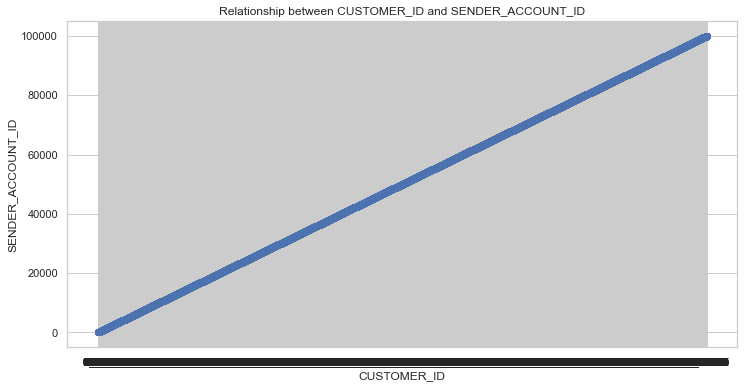

In [69]:
plt.figure(figsize=(12, 6))

plt.scatter(data['CUSTOMER_ID'], data['SENDER_ACCOUNT_ID'], alpha=0.5, marker='o')
plt.title('Relationship between CUSTOMER_ID and SENDER_ACCOUNT_ID')
plt.xlabel('CUSTOMER_ID')
plt.ylabel('SENDER_ACCOUNT_ID')
plt.grid(True)
plt.show()

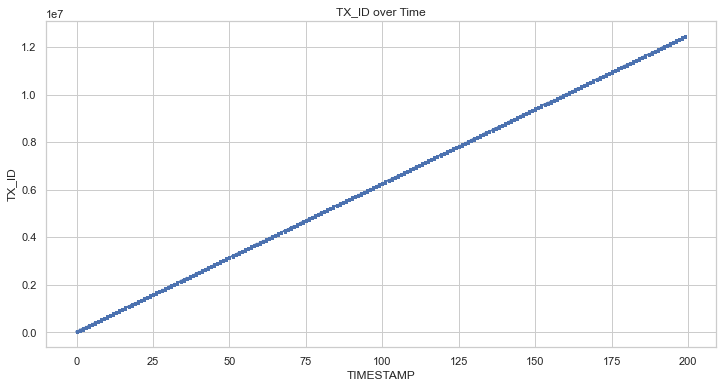

In [70]:
plt.figure(figsize=(12, 6))

data_sorted = data.sort_values(by='TIMESTAMP')

plt.plot(data_sorted['TIMESTAMP'], data_sorted['TX_ID'], marker='o', linestyle='-', markersize=2)
plt.title('TX_ID over Time')
plt.xlabel('TIMESTAMP')
plt.ylabel('TX_ID')
plt.grid(True)
plt.show()

CUSTOMER_ID and TX_ID are redundant.

In [71]:
data.drop(['CUSTOMER_ID', 'TX_ID'], axis=1, inplace=True)

In [72]:
data

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,INIT_BALANCE,TX_BEHAVIOR_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID,ALERT_TYPE
0,0,17570,184.44,1,184.44,1,False,-1,None
1,0,17570,184.44,1,184.44,30,False,-1,None
2,0,17570,184.44,1,184.44,37,False,-1,None
3,0,17570,184.44,1,184.44,47,False,-1,None
4,0,17570,184.44,1,184.44,49,False,-1,None
...,...,...,...,...,...,...,...,...,...
12476007,99999,72612,390.89,5,390.89,194,False,-1,None
12476008,99999,92981,390.89,5,390.89,194,False,-1,None
12476009,99999,19105,390.89,5,390.89,194,False,-1,None
12476010,99999,45752,390.89,5,390.89,194,False,-1,None


In [73]:
data.dtypes

SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
INIT_BALANCE           float64
TX_BEHAVIOR_ID          object
TX_AMOUNT              float64
TIMESTAMP                int64
IS_FRAUD                  bool
ALERT_ID                object
ALERT_TYPE              object
dtype: object

In [74]:
# Convert SENDER_ACCOUNT_ID and RECEIVER_ACCOUNT_ID to object
data['SENDER_ACCOUNT_ID'] = data['SENDER_ACCOUNT_ID'].astype('object')
data['RECEIVER_ACCOUNT_ID'] = data['RECEIVER_ACCOUNT_ID'].astype('object')

In [75]:
data.dtypes

SENDER_ACCOUNT_ID       object
RECEIVER_ACCOUNT_ID     object
INIT_BALANCE           float64
TX_BEHAVIOR_ID          object
TX_AMOUNT              float64
TIMESTAMP                int64
IS_FRAUD                  bool
ALERT_ID                object
ALERT_TYPE              object
dtype: object

In [85]:
data.to_csv('integrated_data.csv')

In [77]:
data['TIMESTAMP']

0             1
1            30
2            37
3            47
4            49
           ... 
12476007    194
12476008    194
12476009    194
12476010    194
12476011    194
Name: TIMESTAMP, Length: 12476012, dtype: int64

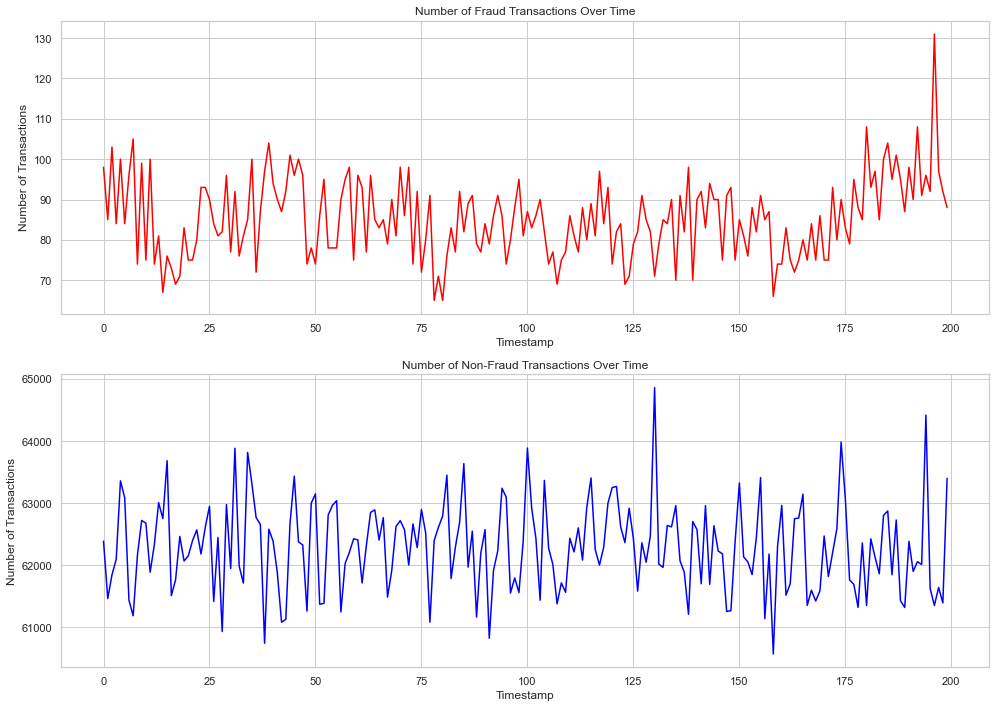

In [78]:
data['TIMESTAMP'] = pd.to_numeric(data['TIMESTAMP'])

# Resample the data by TIMESTAMP and count fraud vs. non-fraud transactions
fraud_counts = data[data['IS_FRAUD'] == 1].groupby('TIMESTAMP').size()
non_fraud_counts = data[data['IS_FRAUD'] == 0].groupby('TIMESTAMP').size()

# Create a DataFrame with the counts
counts_df = pd.DataFrame({
    'Fraud': fraud_counts,
    'Non-Fraud': non_fraud_counts
}).fillna(0).astype(int)

# Plot the data using subplots
plt.figure(figsize=(14, 10))

# Subplot for fraud transactions
plt.subplot(2, 1, 1)
sns.lineplot(data=counts_df['Fraud'], color='red')
plt.title('Number of Fraud Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.grid(True)

# Subplot for non-fraud transactions
plt.subplot(2, 1, 2)
sns.lineplot(data=counts_df['Non-Fraud'], color='blue')
plt.title('Number of Non-Fraud Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.grid(True)

plt.tight_layout()
plt.show()

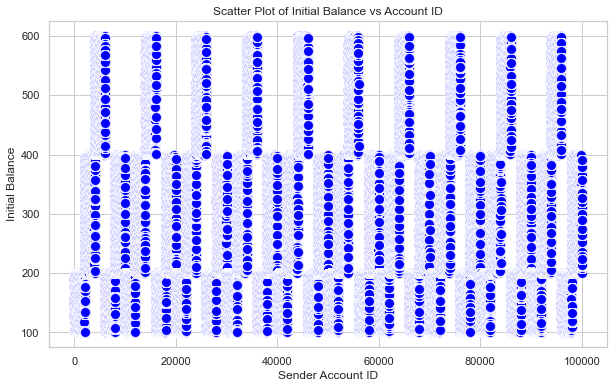

In [79]:
# Scatter plot to identify outliers
plt.figure(figsize=(10, 6))
plt.scatter(data['SENDER_ACCOUNT_ID'], data['INIT_BALANCE'], alpha=0.6, color='blue', edgecolors='w', s=100)
plt.title('Scatter Plot of Initial Balance vs Account ID')
plt.xlabel('Sender Account ID')
plt.ylabel('Initial Balance')
plt.grid(True)
plt.show()

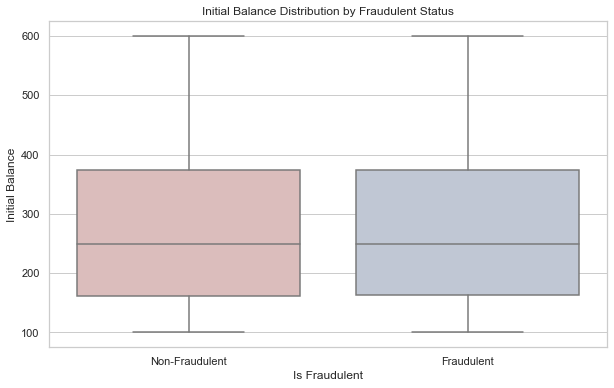

In [80]:
# Box plot for initial balances
plt.figure(figsize=(10, 6))
sns.boxplot(x='IS_FRAUD', y='INIT_BALANCE', data=accounts, palette='vlag_r')
plt.title('Initial Balance Distribution by Fraudulent Status')
plt.xlabel('Is Fraudulent')
plt.ylabel('Initial Balance')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

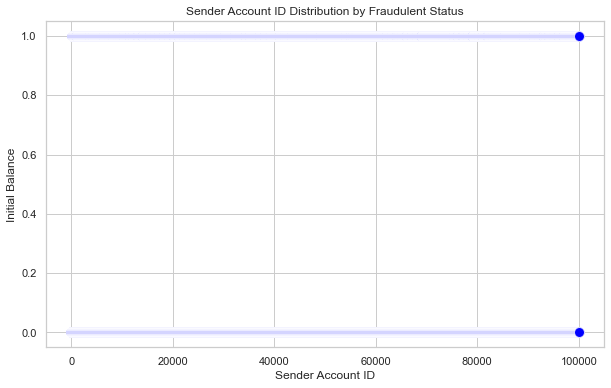

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(data['SENDER_ACCOUNT_ID'], data['IS_FRAUD'], alpha=0.6, color='blue', edgecolors='w', s=100)
plt.title('Sender Account ID Distribution by Fraudulent Status')
plt.xlabel('Sender Account ID')
plt.ylabel('Initial Balance')
plt.grid(True)
plt.show()

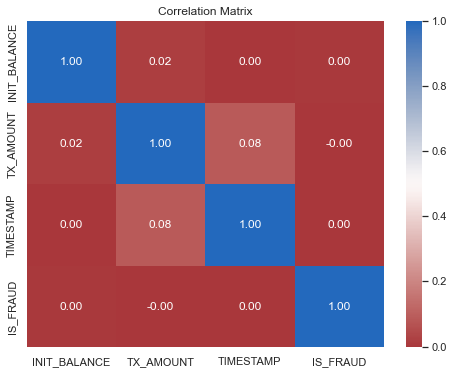

In [82]:
#look for correlations
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()